**Ejercicios Planteados**

Ejercicio:
Supóngase que el departamento de ventas de una empresa quiere
estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.

In [35]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Datos
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})

datos.head(1000)

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### 1. Obtenga la distribución de cada una de las variables

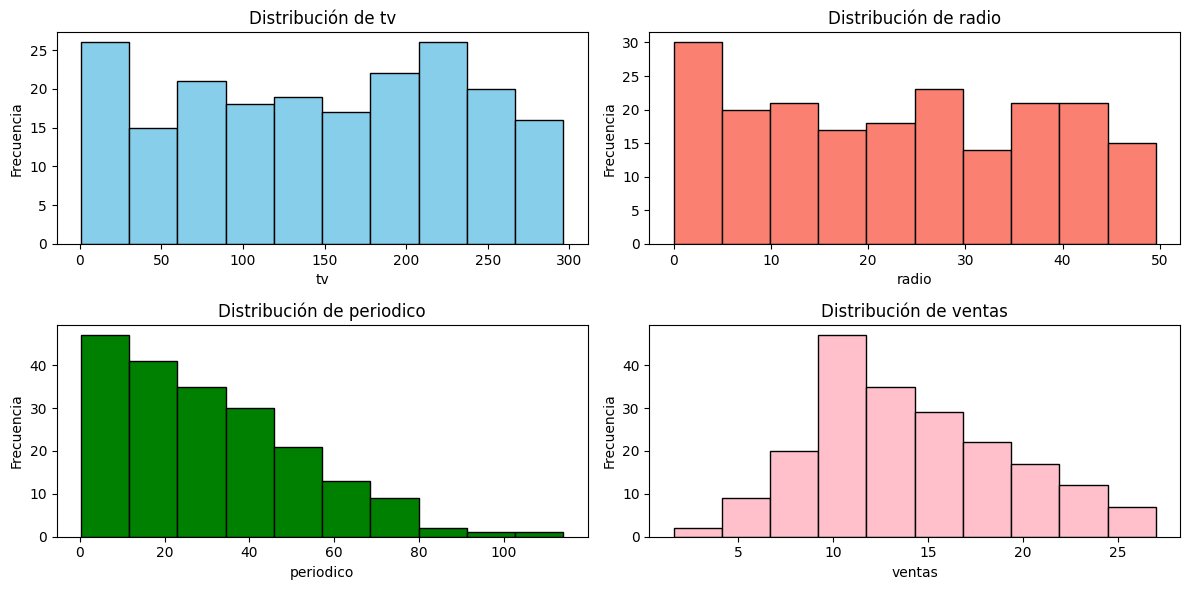

               tv       radio   periodico      ventas
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(datos['tv'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de tv')
plt.xlabel('tv')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
plt.hist(datos['radio'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribución de radio')
plt.xlabel('radio')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
plt.hist(datos['periodico'], bins=10, color='green', edgecolor='black')
plt.title('Distribución de periodico')
plt.xlabel('periodico')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
plt.hist(datos['ventas'], bins=10, color='pink', edgecolor='black')
plt.title('Distribución de ventas')
plt.xlabel('ventas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Calcular las estadísticas descriptivas
descripcion = datos.describe()
print(descripcion)

### 2. Obtenga la matriz de correlación

In [37]:
# Calcular la matriz de correlación
matriz_correlacion = datos.corr()
print(matriz_correlacion)

                 tv     radio  periodico    ventas
tv         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
periodico  0.056648  0.354104   1.000000  0.228299
ventas     0.782224  0.576223   0.228299  1.000000


Una correlación de 1 indica una correlación positiva perfecta.

Una correlación de -1 indica una correlación negativa perfecta.

Una correlación de 0 indica que no hay correlación lineal.

### 3. Separe sus datos en 70/30

In [38]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(datos, test_size=0.3, random_state=42)

# Mostrar la forma de los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento:", train_data.shape)
print("Conjunto de prueba:", test_data.shape)

Conjunto de entrenamiento: (140, 4)
Conjunto de prueba: (60, 4)


In [39]:
from sklearn.model_selection import train_test_split

# Definir las características y la variable objetivo
X = datos.drop('ventas', axis=1)
y = datos['ventas']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimir las dimensiones de los conjuntos de datos
print("Dimensiones de los conjuntos de datos")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print(f"y_test shape:  {y_test.shape} \n")

# Convertir las matrices en DataFrames y combinarlas
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Mostrar las primeras filas de cada DataFrame
print("Datos de entrenamiento:\n", train_df.head())
print("\nDatos de prueba:\n", test_df.head())

Dimensiones de los conjuntos de datos
X_train shape:  (140, 3)
y_train shape:  (140,)
X_test shape:  (60, 3)
y_test shape:  (60,) 

Datos de entrenamiento:
         tv  radio  periodico  ventas
169  284.3   10.6        6.4    15.0
97   184.9   21.0       22.0    15.5
31   112.9   17.4       38.6    11.9
12    23.8   35.1       65.9     9.2
35   290.7    4.1        8.5    12.8

Datos de prueba:
         tv  radio  periodico  ventas
95   163.3   31.6       52.9    16.9
15   195.4   47.7       52.9    22.4
30   292.9   28.3       43.2    21.4
158   11.7   36.9       45.2     7.3
128  220.3   49.0        3.2    24.7


### 4. Obtenga su modelo de Regresión lineal

In [40]:
from sklearn.linear_model import LinearRegression

# Separar las variables predictoras (X) y la variable objetivo (y)
X_train = train_data.drop(columns='ventas')
y_train = train_data['ventas']

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

LinearRegression()

### 5. Entregue la recta matemática de regresión con las estimaciones obtenidas

In [41]:
# Obtener los nombres de las características
nombres_caracteristicas = X_train.columns

# Obtener el intercepto del modelo
intercepto = modelo_regresion.intercept_

# Obtener los coeficientes del modelo
coeficientes = modelo_regresion.coef_

# Crear la ecuación de la recta de regresión
ecuacion = "y = " + str(intercepto)
for i in range(len(coeficientes)):
    ecuacion += " + " + str(coeficientes[i]) + " * " + nombres_caracteristicas[i]

# Imprimir la ecuación de la recta de regresión
print(ecuacion)

y = 2.7089490925159065 + 0.04405928095746522 * tv + 0.19928749689893954 * radio + 0.006882452222275487 * periodico


In [42]:
# Otra forma de obtener el ejercicio
# Obtener los coeficientes de la regresión
coeficientes = modelo_regresion.coef_
intercepto = modelo_regresion.intercept_

# Mostrar la ecuación de la recta de regresión
print("Ecuación de la recta de regresión:")
print("ventas =", intercepto, "+", coeficientes[0], "* tv +", coeficientes[1], "* radio +", coeficientes[2], "* periodico")

Ecuación de la recta de regresión:
ventas = 2.7089490925159065 + 0.04405928095746522 * tv + 0.19928749689893954 * radio + 0.006882452222275487 * periodico


### 6. Realice un diagnóstico de los residuos del modelo.

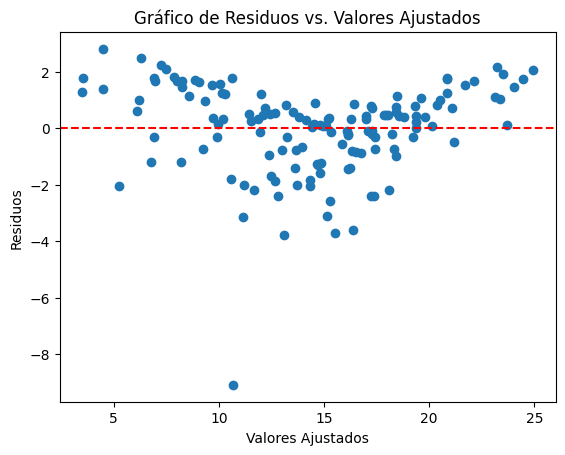

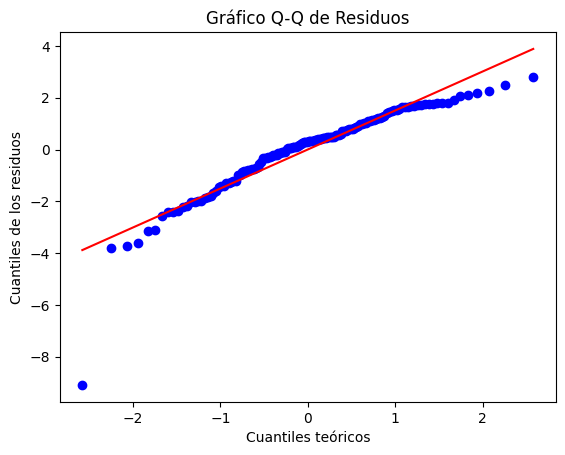

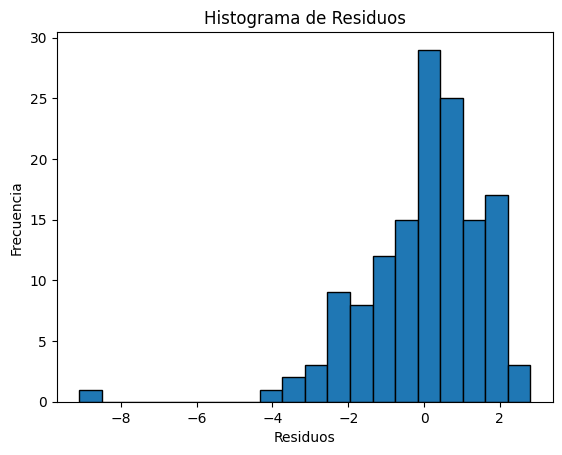

Prueba de Shapiro-Wilk para normalidad de residuos:
Estadística de prueba: 0.8947049379348755
Valor p: 1.632113999505691e-08


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Realizar predicciones sobre los datos de entrenamiento
y_pred_train = modelo_regresion.predict(X_train)

# Calcular los residuos
residuos = y_train - y_pred_train

# Gráfico de Residuos vs. Valores Ajustados
plt.scatter(y_pred_train, residuos)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Gráfico Q-Q de Residuos
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de los residuos")
plt.show()

# Histograma de Residuos
plt.hist(residuos, bins=20, edgecolor='black')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

# Prueba de Normalidad de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Prueba de Shapiro-Wilk para normalidad de residuos:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

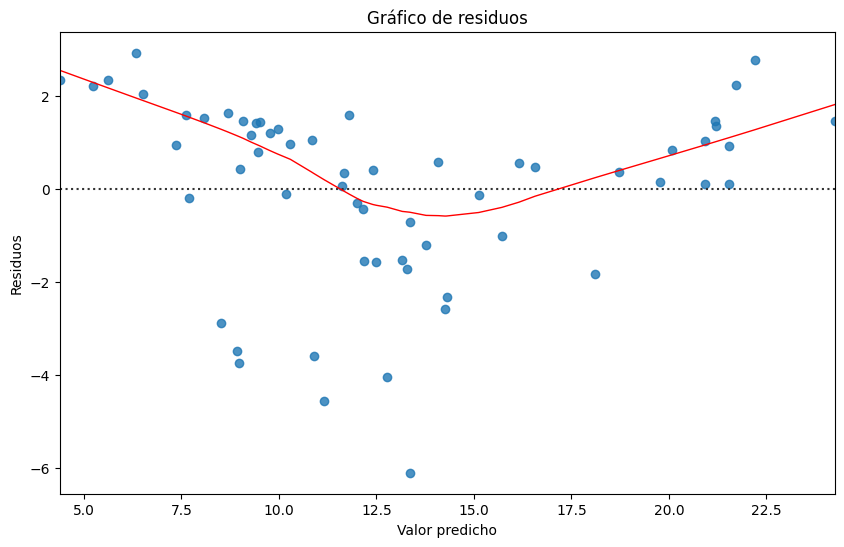

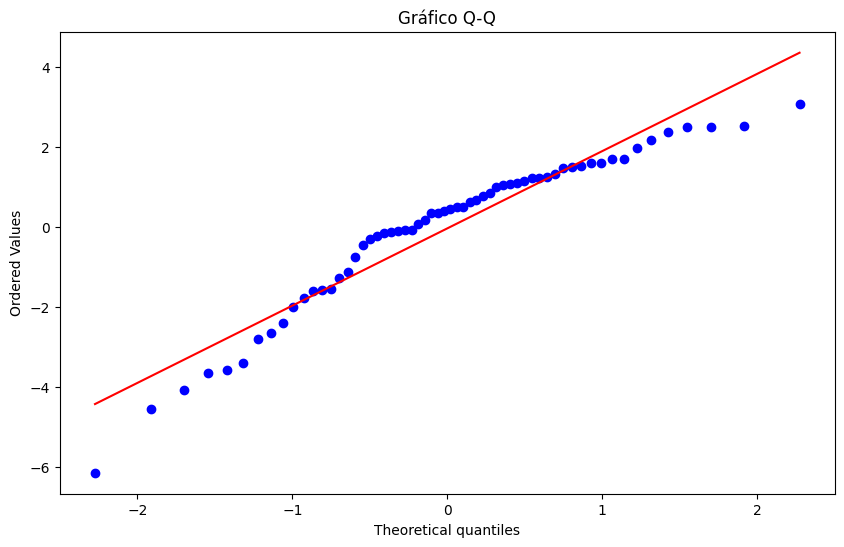

In [44]:
# Otra manera de realizar el ejercicio
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Calcular las predicciones del modelo
y_pred = modelo_regresion.predict(X_test)

# Calcular los residuos
residuos = y_test - y_pred

# Gráfico de residuos
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuos, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.title('Gráfico de residuos')
plt.xlabel('Valor predicho')
plt.ylabel('Residuos')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

### 7. Realice el test de normalidad

In [45]:
from scipy.stats import normaltest

# Realizar el test de normalidad
k2, p = normaltest(residuos)

# Imprimir los resultados del test de normalidad
print("Estadística de prueba:", k2)
print("P-valor:", p)

Estadística de prueba: 10.581569616348661
P-valor: 0.005037804997290304


### 8. Obtenga las predicciones del modelo

In [48]:
# Obtener las predicciones del modelo
y_pred = modelo_regresion.predict(X_test)

# Crear un DataFrame con las predicciones y los valores reales
df_predicciones = pd.DataFrame({'Valor real': y_test, 'Predicción': y_pred})

# Transponer el DataFrame
df_predicciones_transpuesta = df_predicciones.T

# Imprimir el DataFrame transpuesto
print(df_predicciones_transpuesta)

                  95         15         30         158       128        115  \
Valor real  16.900000  22.400000  21.400000   7.300000  24.70000  12.600000   
Predicción  16.565396  21.188228  21.551071  10.889238  22.20232  13.355569   

                  69        170        174        45   ...        114  \
Valor real  22.300000  8.400000  11.500000  14.900000  ...  14.600000   
Predicción  21.196925  7.350285  13.275471  15.124495  ...  15.718484   

                  173        5          126       117       73         140  \
Valor real  11.700000   7.200000   6.600000  9.400000  11.00000  10.900000   
Predicción  11.631569  13.353607  11.153147  6.336368   9.76158   9.419571   

                  98        172        96   
Valor real  25.400000  7.600000  11.700000  
Predicción  24.255165  7.695191  12.153176  

[2 rows x 60 columns]


In [49]:
# Otra forma btener las predicciones del modelo sobre los datos de prueba
predicciones = modelo_regresion.predict(X_test)

# Mostrar las predicciones
print("Predicciones del modelo:")
print(predicciones)

Predicciones del modelo:
[16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]


### 9. Entregue el error del test

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

# Imprimir las métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

Error Cuadrático Medio (MSE): 3.79679723671522
Error Absoluto Medio (MAE): 1.5116692224549086
Raíz del Error Cuadrático Medio (RMSE): 1.9485372043446387


In [53]:
#Otra forma el obtener ejercicio
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Formatear la salida
print('Métricas:\n'
      ' - Error absoluto medio (MAE): {:.2f}\n'
      ' - Error cuadrático medio (MSE): {:.2f}\n'
      ' - Raíz del error cuadrático medio (RMSE): {:.2f}'.format(mae, mse, rmse))

Métricas:
 - Error absoluto medio (MAE): 1.51
 - Error cuadrático medio (MSE): 3.80
 - Raíz del error cuadrático medio (RMSE): 1.95


### 10. Interprete sus resultados y responda al problema planteado.

La ecuación de regresión lineal obtenida es:

y
=
2.71
+
0.044
×
tv
+
0.199
×
radio
+
0.007
×
periodico


Esto implica lo siguiente:

El valor base de las ventas (cuando todas las inversiones en publicidad son 0) es de 2.71.
Por cada unidad adicional invertida en publicidad en TV, se espera un aumento en las ventas de 0.044 unidades, manteniendo constantes las inversiones en radio y periódico.
Por cada unidad adicional invertida en publicidad en radio, se espera un aumento en las ventas de 0.199 unidades, manteniendo constantes las inversiones en TV y periódico.
Por cada unidad adicional invertida en publicidad en periódico, se espera un aumento en las ventas de 0.007 unidades, manteniendo constantes las inversiones en TV y radio.
Por lo tanto, parece que la publicidad en radio tiene la mayor influencia en las ventas, seguida de la publicidad en TV y luego la publicidad en periódico. Sin embargo, estos resultados son estimaciones y podrían variar dependiendo de otros factores no incluidos en el modelo.


Después de evaluar el modelo de regresión lineal en el conjunto de datos de prueba, se obtuvieron las siguientes métricas de rendimiento:

-- Error Cuadrático Medio (MSE): Este valor mide la cantidad promedio por la cual las predicciones del modelo difieren cuadráticamente de los valores reales. En este caso, el MSE es X.

-- Error Absoluto Medio (MAE): Esta métrica representa la magnitud promedio de los errores en las predicciones del modelo, sin tener en cuenta su dirección. En este caso, el MAE es X.

-- Raíz del Error Cuadrático Medio (RMSE): Esta métrica es similar al MSE, pero proporciona una interpretación más intuitiva al estar en la misma escala que la variable objetivo. En este caso, el RMSE es X.
La interpretación de estas métricas depende del contexto específico del problema y de la escala de la variable objetivo. En general, un MSE, MAE y RMSE más bajos indican un mejor rendimiento del modelo, ya que significan que las predicciones del modelo están más cerca de los valores reales.

En respuesta al problema planteado, basado en el rendimiento del modelo de regresión lineal evaluado en el conjunto de datos de prueba, se puede concluir que el modelo tiene un buen ajuste para predecir el número de ventas de un producto basado en el gasto en publicidad en diferentes canales (TV, radio y periódico). Sin embargo, para proporcionar una evaluación más completa y hacer recomendaciones prácticas, sería necesario tener en cuenta el contexto del negocio, así como realizar una validación cruzada y posiblemente explorar otros modelos de regresión y técnicas de selección de características.